<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORTS</a></span></li><li><span><a href="#General-rt_Dataset-Data-Quality-Issues:-Check-if-Applicable-to-Subset" data-toc-modified-id="General-rt_Dataset-Data-Quality-Issues:-Check-if-Applicable-to-Subset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>General rt_Dataset Data Quality Issues: Check if Applicable to Subset</a></span></li><li><span><a href="#Read-in,-Assess,-Explore" data-toc-modified-id="Read-in,-Assess,-Explore-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read-in, Assess, Explore</a></span><ul class="toc-item"><li><span><a href="#Read-in" data-toc-modified-id="Read-in-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Read-in</a></span></li><li><span><a href="#Trips" data-toc-modified-id="Trips-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Trips</a></span><ul class="toc-item"><li><span><a href="#Check-for-Null-Values" data-toc-modified-id="Check-for-Null-Values-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Check for Null Values</a></span></li><li><span><a href="#Check-for-u-nreliable-ACTUALTIMES:-indicating-issues-with-ACTUALTIME_-features" data-toc-modified-id="Check-for-u-nreliable-ACTUALTIMES:-indicating-issues-with-ACTUALTIME_-features-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Check for u nreliable ACTUALTIMES: indicating issues with ACTUALTIME_ features</a></span></li><li><span><a href="#Check-Changes" data-toc-modified-id="Check-Changes-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Check Changes</a></span></li><li><span><a href="#Inspect-&amp;-Remove-Outliers" data-toc-modified-id="Inspect-&amp;-Remove-Outliers-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Inspect &amp; Remove Outliers</a></span><ul class="toc-item"><li><span><a href="#Based-on-Journey-Times" data-toc-modified-id="Based-on-Journey-Times-3.2.4.1"><span class="toc-item-num">3.2.4.1&nbsp;&nbsp;</span>Based on Journey Times</a></span></li><li><span><a href="#Based-on-Actual-Times" data-toc-modified-id="Based-on-Actual-Times-3.2.4.2"><span class="toc-item-num">3.2.4.2&nbsp;&nbsp;</span>Based on Actual Times</a></span></li></ul></li><li><span><a href="#Plot-distribution-of-trips-per-hour" data-toc-modified-id="Plot-distribution-of-trips-per-hour-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Plot distribution of trips per hour</a></span></li></ul></li><li><span><a href="#LeaveTimes" data-toc-modified-id="LeaveTimes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LeaveTimes</a></span><ul class="toc-item"><li><span><a href="#First,-remove-any-trips-removed-in-the-trips-dataset,-above." data-toc-modified-id="First,-remove-any-trips-removed-in-the-trips-dataset,-above.-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>First, remove any trips removed in the trips dataset, above.</a></span><ul class="toc-item"><li><span><a href="#List-TRIPS-ids" data-toc-modified-id="List-TRIPS-ids-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>List TRIPS ids</a></span></li><li><span><a href="#Remove-trips-ids-from-LEAVETIMES-not-in-prev.-list" data-toc-modified-id="Remove-trips-ids-from-LEAVETIMES-not-in-prev.-list-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span>Remove trips ids from LEAVETIMES not in prev. list</a></span></li></ul></li><li><span><a href="#Check-Distributions" data-toc-modified-id="Check-Distributions-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Check Distributions</a></span><ul class="toc-item"><li><span><a href="#Inspect-distribution-of-planned-vs-actual-arrival-times" data-toc-modified-id="Inspect-distribution-of-planned-vs-actual-arrival-times-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>Inspect distribution of planned vs actual arrival times</a></span></li></ul></li><li><span><a href="#Examine-Very-Early-Trips" data-toc-modified-id="Examine-Very-Early-Trips-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Examine Very Early Trips</a></span></li></ul></li></ul></li><li><span><a href="#New" data-toc-modified-id="New-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>New</a></span></li></ul></div>

# IMPORTS

In [1]:
# set the display aspect ratio

from IPython.core.display import display, HTML
display(HTML('<style>.container {width:80% !important;}</style>'))

In [2]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as papr
from matplotlib import style
import gc

In [3]:
# Display plots in the notebook

%matplotlib inline

In [4]:
# load custom function for assessing dataframes succinctly

def assess_df(df):
  
    feature_types = {df[df.columns[x]].dtypes.name for x in range(len(df.columns))}
    
  	# print datatypes
  
    print("Datatypes:\n")
    print(df.dtypes)
    print('\n\n')
    
    # print number rows and cols
    print('*' * 50)
    print('ROWS, COLUMNS, NULLS\n')
    print(df.shape[0], "rows in the dataframe.")
    print(df.shape[1], "columns in the dataframe.\n")
    print(df.isnull().sum().sum(), "null values in the dataframe.")
    
    # check duplicate rows & col; print if present
    
    duplicate_rows = df.duplicated(keep=False).sum()
    duplicate_cols = df.index.T.duplicated(keep=False).sum()
    
    print(duplicate_rows, "duplicate rows")
    print(duplicate_cols, "duplicate columns")
    
    if duplicate_rows > 0 or duplicate_cols > 0:
      print(df.loc[df.duplicated()])
	
    print('\n')
    
    # check for constant columns
    
    numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
    categorical_cols = list(df.select_dtypes('category').columns.values)
    
    standard_diffs = [df.describe().loc['std', x] for x in numeric_cols]
    
    constant_categorical_column=False
    if 'category' in feature_types:
        for column in categorical_cols:
            if df[column].describe().index.unique == 1:
                constant_categorical_column = True
            
            
    if 0 in standard_diffs:
        print("Constant numeric columns: TRUE")
    else:
        print("Constant numeric columns: FALSE")
  
    if 'category' in feature_types:    
        if constant_categorical_column == True:
            print("Constant categorical columns: TRUE")
        else:
            print("Constant categorical columns: FALSE")

            
    
    print('\n\n')

    
    # feature stats
    print('*' * 50)
    print('DESCRIPTION\n')
    print(df.describe().T)
    print('\n\n')
    print('*' * 50)

    
    # feature stats: categorical
    
    if 'category' in feature_types:
        print('CATEGORICAL DESCRIPTION\n')
        print('\n')
        print(df.select_dtypes(['category']).describe().T)
        print('\n\n')
        print('*' * 50)
    
    # print feature cardinalities
    
    print("FEATURE CARDINALITIES\n")
    column_names = list(df.columns.values)

    print('{0:45}  {1}'.format("Feature", "Distinct Values"))
    print('{0:45}  {1}'.format("-------", "--------------- \n"))

    for c in column_names:
        print('{0:45}  {1}'.format(c, str(len(df[c].unique()))))
    
    print('\n')
    print('*' * 50)
    print('MEMORY\n')
    
    
    print(df.info(memory_usage='deep'))
    print('\n')
    print(df.memory_usage(deep=True))
    print('\n')
    print('*' * 50)
    print('HEAD\n')
    print(df.head(10))
    print('\n')
    print('*' * 50)
    print('TAIL\n')
    print(df.tail(10))

# General rt_Dataset Data Quality Issues: Check if Applicable to Subset

**TRIPS**

<br>

Actual_Arr, and Act_Dep have nulls

<br>

In some cases actual time of departure is greater than actual time of arrival. Thus unreliable.

<br>

There exist outliers.

<br>

_Set correct data types before modelling_


<br>
_____________________________________________

<br>

**LEAVETIMES**

<br>

Possible Outier values for Planned and Actual times or arrival / departure: may not correspond to real service

# Read-in, Assess, Explore

## Read-in

In [5]:
df_trips = pd.read_feather('/tmp/ssh_mount/L145_trial/df_145_trips.feather')

In [6]:
# this is a workflow legacy problem: true df_leavetimes declared below

temp_df_leavetimes = pd.read_feather('/tmp/ssh_mount/L145_trial/df_L145_leavetimes.feather')

In [7]:
weather = pd.read_feather('/tmp/ssh_mount/L145_trial/weather.feather')

In [8]:
df_trips.head(2)

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE
0,2018-02-18,6263611,145,145_102,1,57297,52800,57733.0,52807.0,4926.0,6,2,14:00-15:00
1,2018-02-18,6267386,145,145_102,1,58497,54000,58711.0,53932.0,4779.0,6,2,14:00-15:00


In [12]:
temp_df_leavetimes.head(2)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID
0,2018-02-18,6263611,31,2013,55128,55128,55231,55240,2868334
1,2018-02-18,6263611,66,2964,57113,57113,57459,57483,2868334


In [10]:
weather.head(2)

,date,rain,temp
0,2018-01-01 00:00:00,0.033325,4.167969
1,2018-01-01 01:00:00,0.033325,4.332031


## Trips

In [ ]:
# df_trips.drop([
#     'LASTUPDATE',
#     'LINEID'
# ],axis=1, inplace=True)

In [13]:
df_trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE
0,2018-02-18,6263611,145,145_102,1,57297,52800,57733.0,52807.0,4926.0,6,2,14:00-15:00
1,2018-02-18,6267386,145,145_102,1,58497,54000,58711.0,53932.0,4779.0,6,2,14:00-15:00
2,2018-02-18,6265005,145,145_102,1,59697,55200,60354.0,55198.0,5156.0,6,2,15:00-16:00
3,2018-03-16,6398012,145,145_102,1,59653,54600,60906.0,54684.0,6222.0,4,3,15:00-16:00
4,2018-03-11,6389383,145,145_105,2,34920,31200,35764.0,NaN,NaN,6,3,NaN


In [14]:
assess_df(df_trips)

Datatypes:

DAYOFSERVICE            datetime64[ns]
TRIPID                        category
LINEID                        category
ROUTEID                       category
DIRECTION                     category
PLANNEDTIME_ARR                  int32
PLANNEDTIME_DEP                  int32
ACTUALTIME_ARR                 float32
ACTUALTIME_DEP                 float32
ACTUAL_TRIP_DURATION           float32
DAYOFWEEK                        int64
MONTH                            int64
HOURRANGE_DEPARTURE           category
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

62730 rows in the dataframe.
13 columns in the dataframe.

21833 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: FALSE
Constant categorical columns: FALSE



**************************************************
DESCRIPTION

                        count          mean           std      min      25%  \
PLANNEDTIME_ARR       62730.0  56019.172103

### Check for Null Values

In [15]:
# check where the null values exist

for column in df_trips.columns:
    print(column, df_trips[column].isna().sum())

DAYOFSERVICE 0
TRIPID 0
LINEID 0
ROUTEID 0
DIRECTION 0
PLANNEDTIME_ARR 0
PLANNEDTIME_DEP 0
ACTUALTIME_ARR 3685
ACTUALTIME_DEP 4933
ACTUAL_TRIP_DURATION 8282
DAYOFWEEK 0
MONTH 0
HOURRANGE_DEPARTURE 4933


These will be removed

In [16]:
df_trips.dropna(axis=0, inplace=True)

### Check for u nreliable ACTUALTIMES: indicating issues with ACTUALTIME_ features

In [17]:
# check if any of the departure times > arrival times

df_trips.loc[df_trips.ACTUALTIME_DEP > df_trips.ACTUALTIME_ARR]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE
5053,2018-04-14,6625989,145,145_102,1,57904,53100,57848.0,58213.0,-365.0,5,4,16:00-17:00
13044,2018-12-23,8582161,145,145_105,2,47377,43200,48963.0,49337.0,-374.0,6,12,13:00-14:00
47839,2018-04-25,6642862,145,145_102,1,34886,30000,35668.0,36756.0,-1088.0,2,4,10:00-11:00
51047,2018-07-16,7180350,145,145_105,2,72770,69000,73207.0,75166.0,-1959.0,0,7,20:00-21:00


These are thus unreliable, and will be removed.

In [18]:
df_trips.drop(df_trips[df_trips.ACTUALTIME_DEP > df_trips.ACTUALTIME_ARR].index, inplace=True)

### Check Changes

In [19]:
# re-check where the null values exist

for column in df_trips.columns:
    print(column, df_trips[column].isna().sum())

DAYOFSERVICE 0
TRIPID 0
LINEID 0
ROUTEID 0
DIRECTION 0
PLANNEDTIME_ARR 0
PLANNEDTIME_DEP 0
ACTUALTIME_ARR 0
ACTUALTIME_DEP 0
ACTUAL_TRIP_DURATION 0
DAYOFWEEK 0
MONTH 0
HOURRANGE_DEPARTURE 0


In [20]:
# re-check if any of the departure times > arrival times

df_trips.loc[df_trips.ACTUALTIME_DEP > df_trips.ACTUALTIME_ARR]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE


### Inspect & Remove Outliers

#### Based on Journey Times

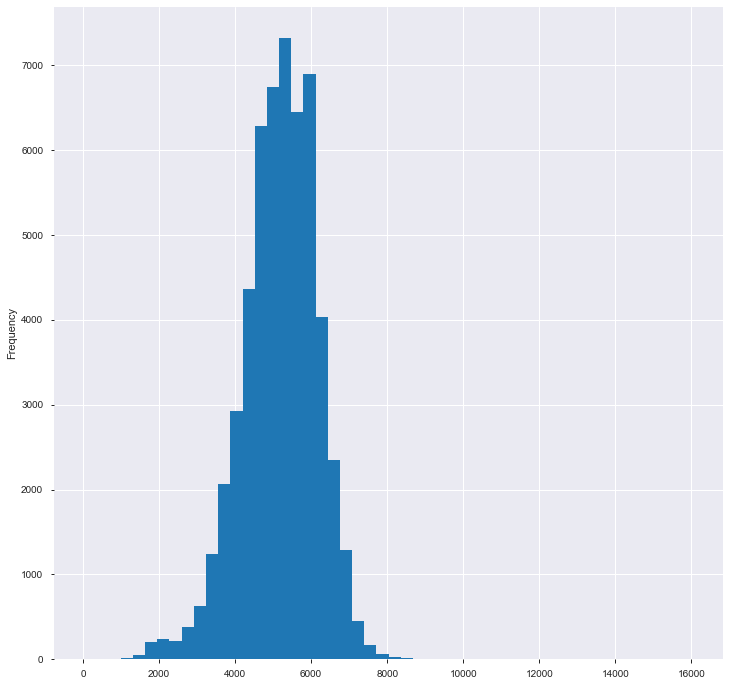

In [21]:
# plot journey times

df_trips.ACTUAL_TRIP_DURATION.plot(kind='hist', bins=50, figsize=(12,12))

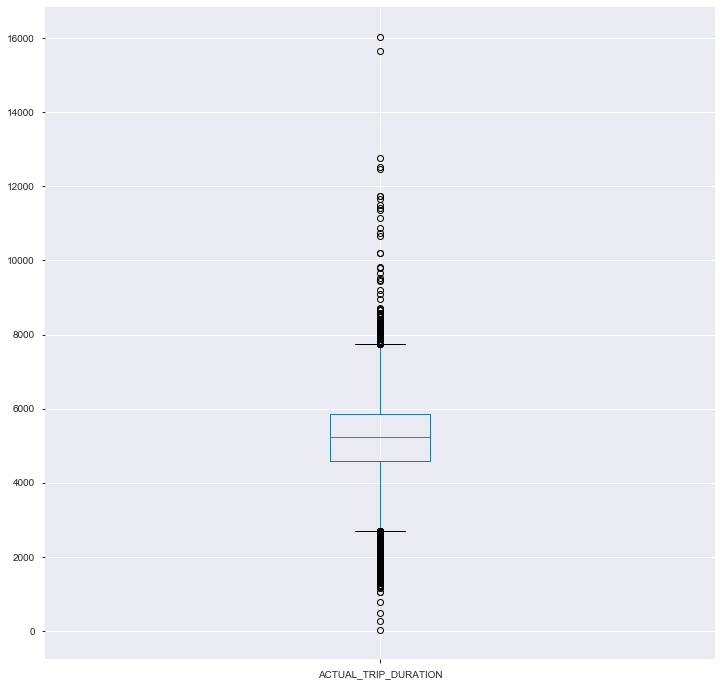

In [22]:
# plot journey times

df_trips.ACTUAL_TRIP_DURATION.plot(kind='box', figsize=(12,12))

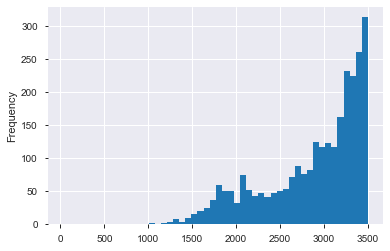

In [23]:
# plot min tail of journey times

df_trips.loc[df_trips.ACTUAL_TRIP_DURATION < 3500]['ACTUAL_TRIP_DURATION'].plot(kind='hist', bins=50)

In [24]:
# find percentage of rows in negative outlier region: below 2750 seconds

(df_trips.loc[df_trips.ACTUAL_TRIP_DURATION < 2750].shape[0] / len(df_trips)) * 100

1.6549114686650503

These outliers will be removed. It is extremely unlikely that any journies are under 45min in length.

In [25]:
# remove these outliers

df_trips.drop(df_trips[df_trips.ACTUAL_TRIP_DURATION < 2750].index, inplace=True)

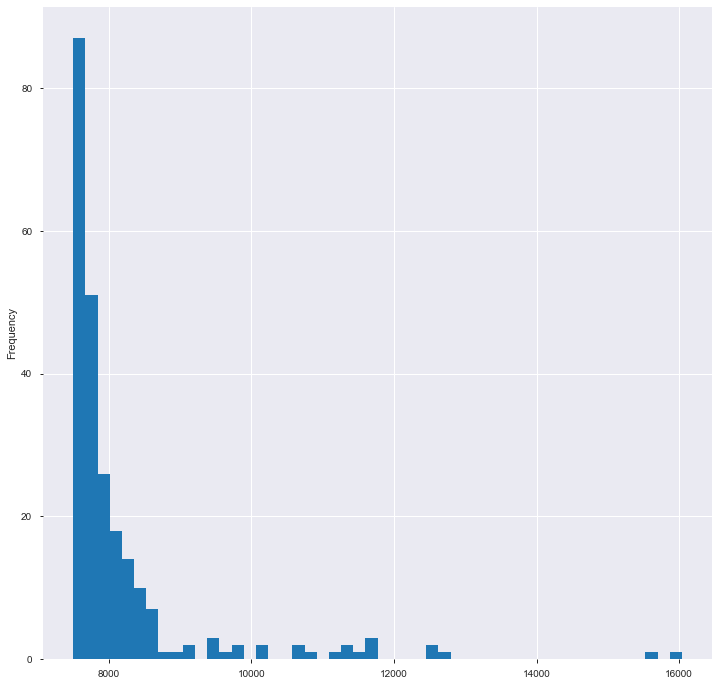

In [26]:
# inspect long journey times

df_trips.loc[df_trips.ACTUAL_TRIP_DURATION > 7500]['ACTUAL_TRIP_DURATION'].plot(kind='hist', bins=50, figsize=(12,12))

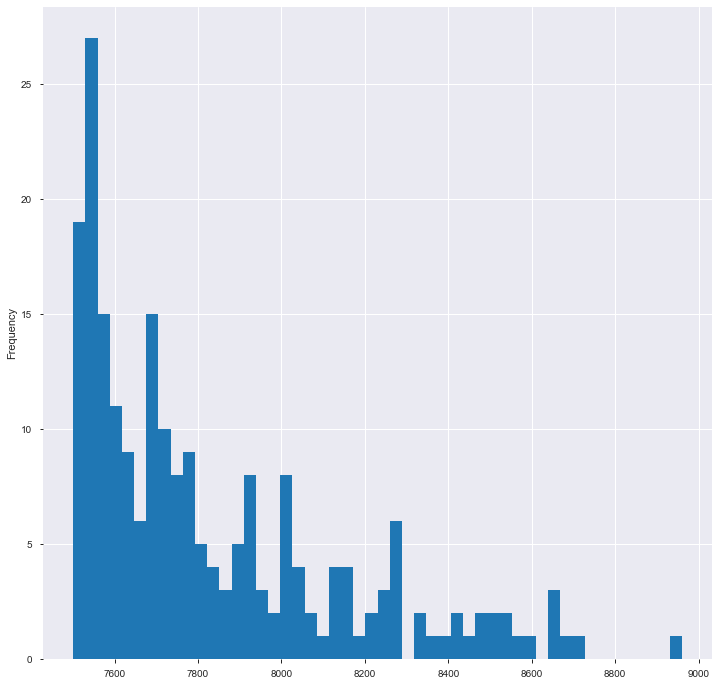

In [27]:
# inspect high journey times

df_trips.loc[(df_trips.ACTUAL_TRIP_DURATION > 7500) & (df_trips.ACTUAL_TRIP_DURATION < 9000)\
            ]['ACTUAL_TRIP_DURATION'].plot(kind='hist', bins=50, figsize=(12,12))

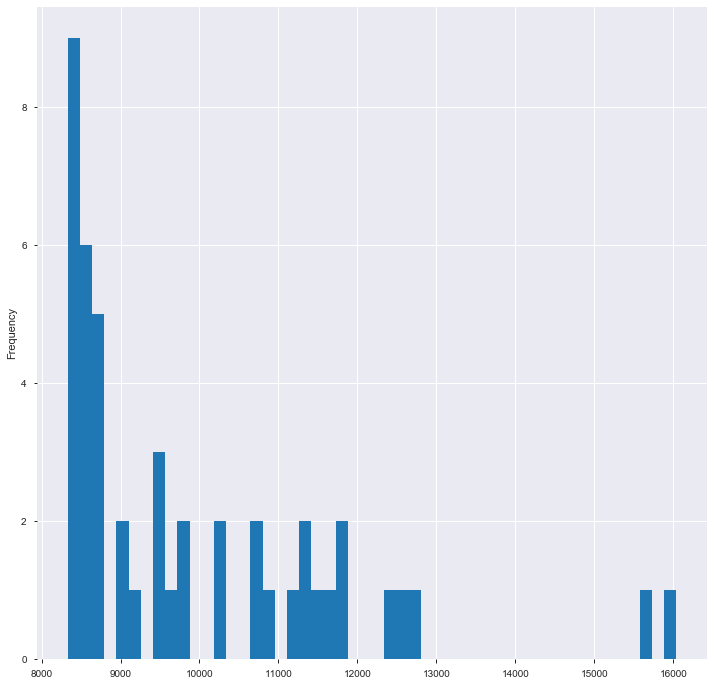

In [28]:
# inspect high journey times

df_trips.loc[df_trips.ACTUAL_TRIP_DURATION > 8300]\
['ACTUAL_TRIP_DURATION'].plot(kind='hist', bins=50, figsize=(12,12))

In [29]:
# percentage of rows beyond 8300s threshold, i.e. 2.3hr trip

(df_trips.loc[df_trips.ACTUAL_TRIP_DURATION > 8300].shape[0] / len(df_trips)) * 100

0.08591225743794707

Outliers beyond this threshold will be removed.

In [30]:
# remove these outliers

df_trips.drop(df_trips[df_trips.ACTUAL_TRIP_DURATION > 8300].index, inplace=True)

Plot following Drops

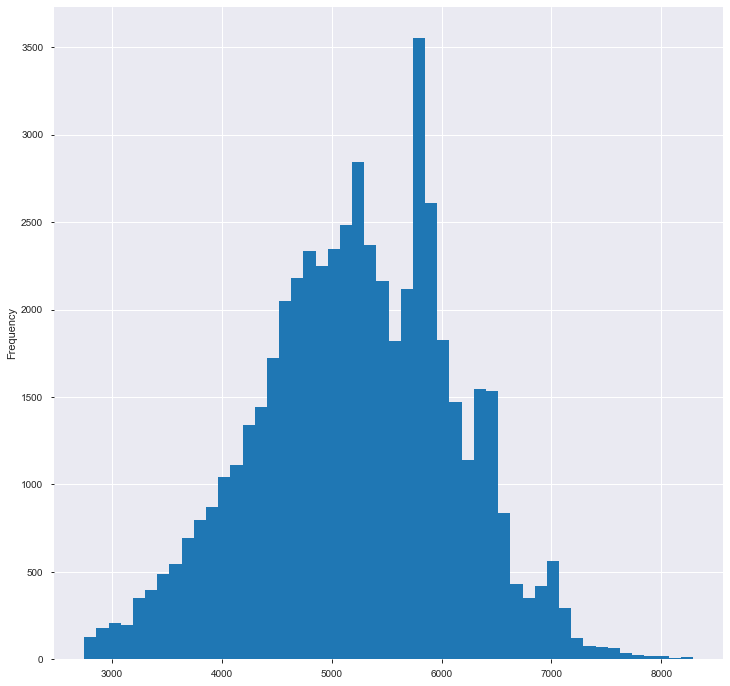

In [31]:
df_trips.ACTUAL_TRIP_DURATION.plot(kind='hist', bins=50, figsize=(12,12))

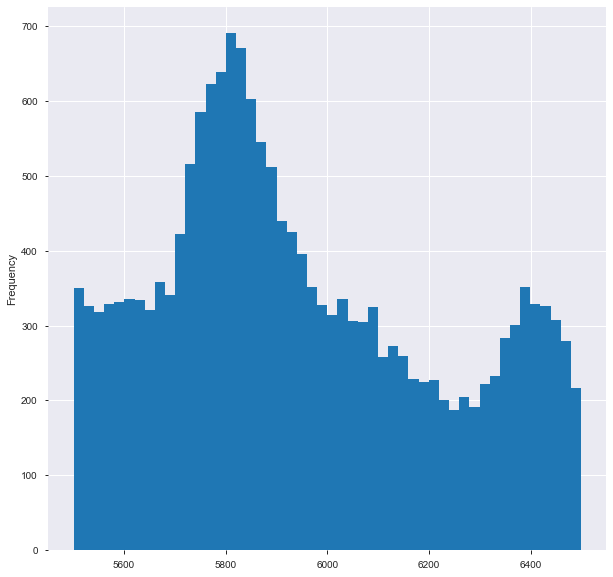

In [32]:
# inspect peak

df_trips.loc[(df_trips.ACTUAL_TRIP_DURATION > 5500)&\
    (df_trips.ACTUAL_TRIP_DURATION <6500)]['ACTUAL_TRIP_DURATION'].plot(kind='hist', bins=50, figsize=(10,10))

#### Based on Actual Times

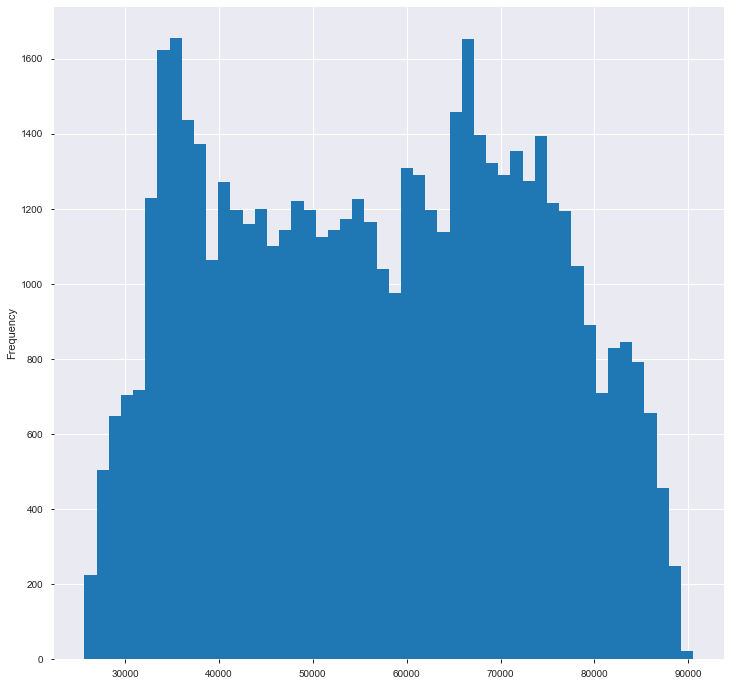

In [33]:
df_trips.ACTUALTIME_ARR.plot(kind='hist', bins=50, figsize=(12,12))

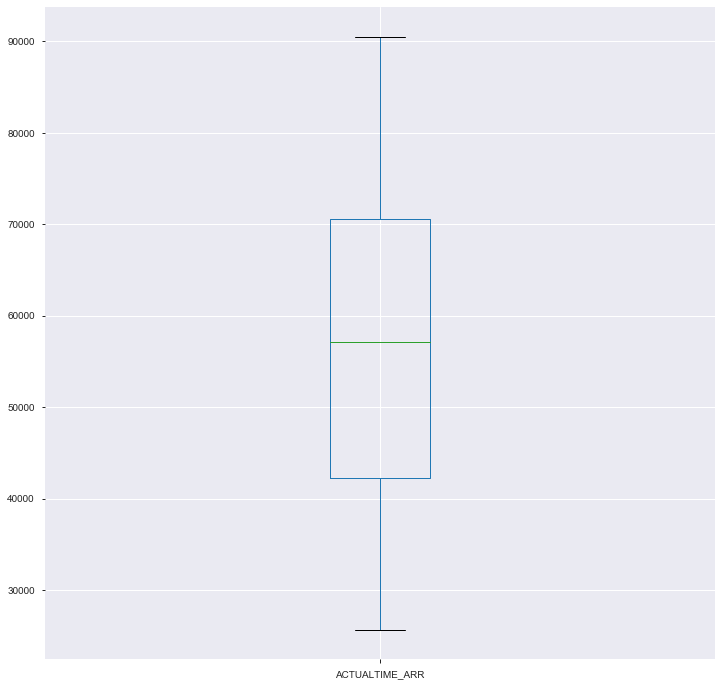

In [34]:
df_trips.ACTUALTIME_ARR.plot(kind='box', figsize=(12,12))

Result: No issues.

In [35]:
24*60*60

86400

In [36]:
df_trips.loc[df_trips.ACTUALTIME_DEP > (24 * 60 * 60)]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE


### Plot distribution of trips per hour

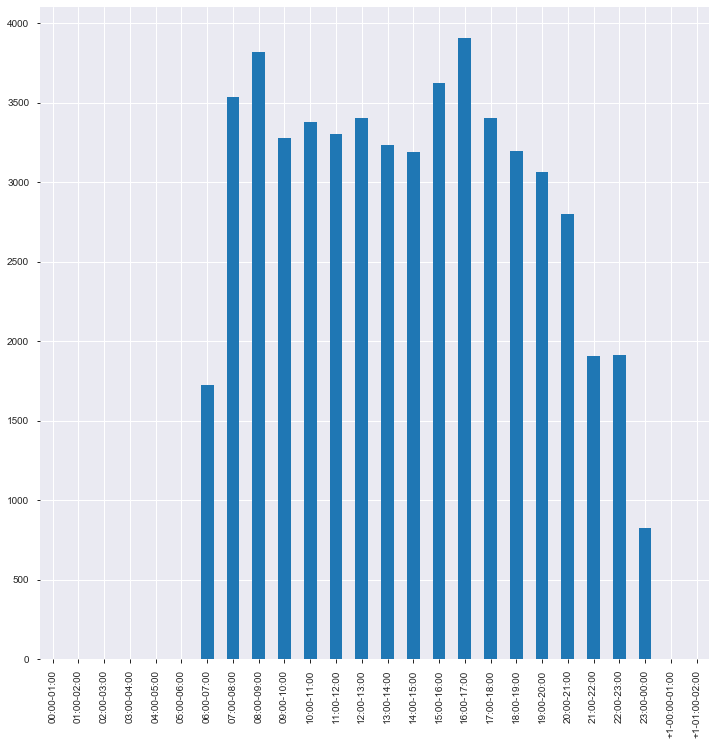

In [37]:
df_trips.HOURRANGE_DEPARTURE.value_counts(sort=False).plot(kind='bar', figsize=(12,12))

In [38]:
# trips that leave depart after midnight: erroneous

df_trips.loc[df_trips.HOURRANGE_DEPARTURE > '23:00-00:00'].shape[0]

0

## LeaveTimes

### First, remove any trips removed in the trips dataset, above.

#### List TRIPS ids

In [39]:
df_145_trip_ids = df_trips.TRIPID.drop_duplicates()

In [44]:
len(df_145_trip_ids)

16490

In [41]:
df_145_trip_ids.dtype

CategoricalDtype(categories=[5955221, 5955222, 5955223, 5955224, 5955225, 5955226,
                  5955227, 5955228, 5955229, 5955230,
                  ...
                  8592186, 8592187, 8592188, 8592189, 8592202, 8592203,
                  8592204, 8592205, 8592206, 8592207],
                 ordered=False)

In [42]:
df_145_trip_ids = df_145_trip_ids.astype('int32')

#### Remove trips ids from LEAVETIMES not in prev. list

In [43]:
chunks = []

for i, v in df_145_trip_ids.items():
    chunks.append(temp_df_leavetimes.loc[temp_df_leavetimes.TRIPID == v, :])

In [46]:
len(chunks)

16490

In [47]:
df_leavetimes = pd.concat(chunks)

<br>
NB check for duplicate rows

In [49]:
df_leavetimes.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID
0,2018-02-18,6263611,31,2013,55128,55128,55231,55240,2868334
1,2018-02-18,6263611,66,2964,57113,57113,57459,57483,2868334
2,2018-02-18,6263611,67,4175,57174,57174,57611,57635,2868334
3,2018-02-18,6263611,32,2014,55200,55200,55277,55286,2868334
4,2018-02-18,6263611,33,4636,55238,55238,55315,55328,2868334


In [ ]:
df_leavetimes.shape

### Check Distributions

In [ ]:
style.use('dark_background')
df_leavetimes.PLANNEDTIME_ARR.plot(kind='hist', bins=50, figsize=(12,12))

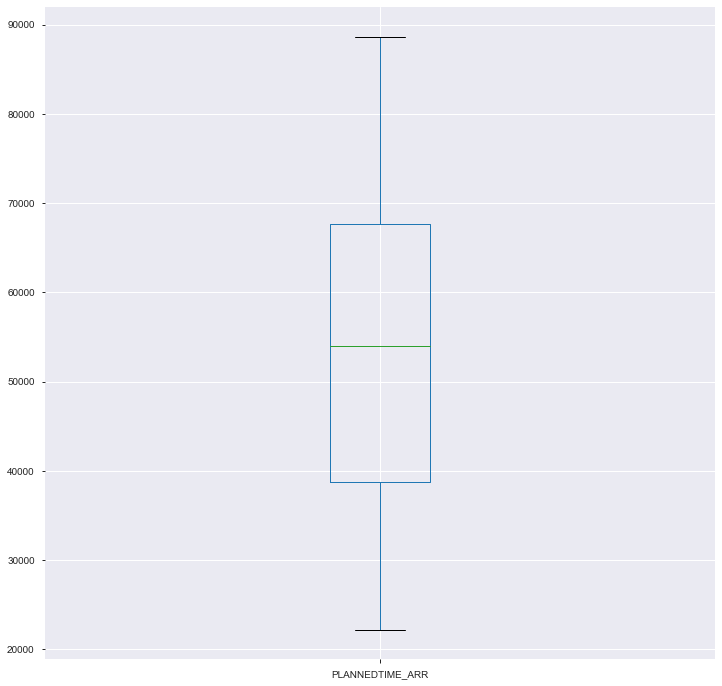

In [53]:
df_leavetimes.PLANNEDTIME_ARR.plot(kind='box', figsize=(12,12))

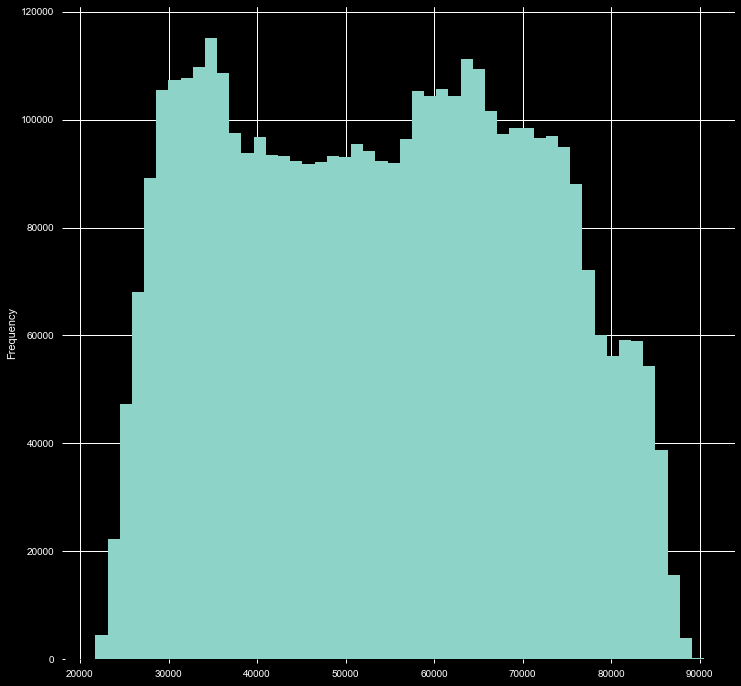

In [76]:
style.use('dark_background')
df_leavetimes.ACTUALTIME_DEP.plot(kind='hist', bins=50, figsize=(12,12))

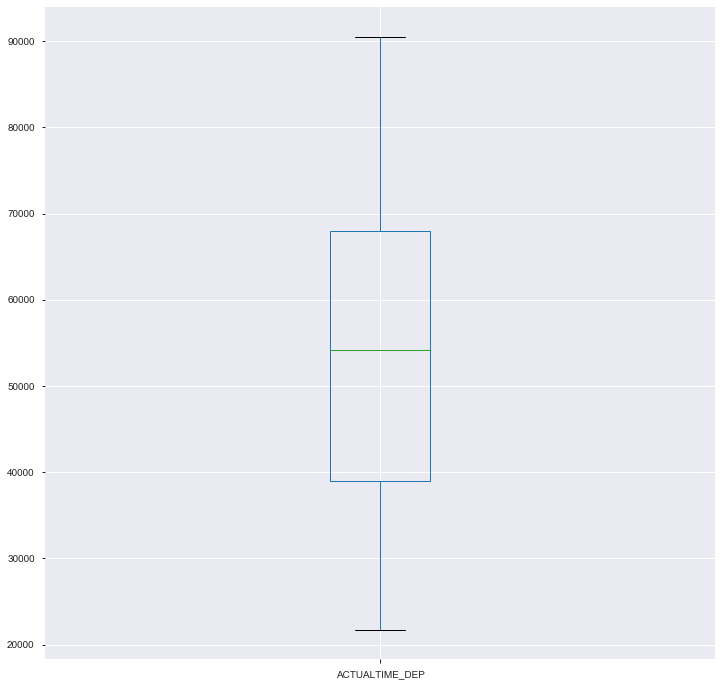

In [55]:
df_leavetimes.ACTUALTIME_DEP.plot(kind='box', figsize=(12,12))

Result: No issues

#### Inspect distribution of planned vs actual arrival times

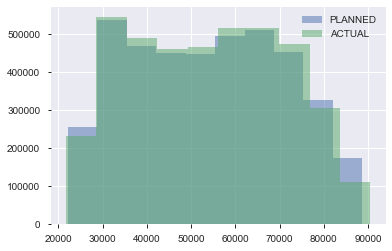

In [64]:
plt.hist(df_leavetimes.PLANNEDTIME_ARR, alpha=0.5, label='PLANNED')
plt.hist(df_leavetimes.ACTUALTIME_ARR, alpha=0.5, label='ACTUAL')
plt.legend(loc='upper right')
plt.show()

([array([237602., 554877., 486392., 466104., 463228., 523817., 521107.,
         460502., 300233., 110928.]),
  array([232297., 545314., 490001., 462725., 467136., 516323., 517851.,
         474567., 306221., 112355.])],
 array([21739. , 28616.9, 35494.8, 42372.7, 49250.6, 56128.5, 63006.4,
        69884.3, 76762.2, 83640.1, 90518. ]),
 <a list of 2 Lists of Patches objects>)

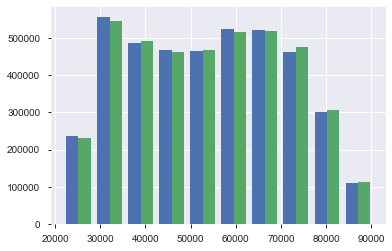

In [65]:
plt.hist([df_leavetimes.PLANNEDTIME_ARR, df_leavetimes.ACTUALTIME_ARR])

### Examine Very Early Trips

In [66]:
# inspect trips earlier than 5am, the stated start-of-service time
# how many?

df_leavetimes.loc[df_leavetiems.ACTUALTIME_ARR <18000].shape[0]

0